In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset and assign to variable netflix
data = pd.read_csv("SBUX.csv")

In [ ]:
#Read the first 10 rows of the dataset
print("First 10 rows of the dataset:")
data.head(11)

First 10 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-14,111.36,111.82,111.13,111.39,106.21,19200
1,2019-02-15,111.83,113.02,111.55,112.80,107.55,25900
2,2019-02-19,113.15,114.93,113.05,114.55,109.22,48700
3,2019-02-20,114.15,115.34,114.15,115.22,109.86,82600
4,2019-02-21,115.37,115.50,114.75,115.11,109.75,27100
5,2019-02-22,114.85,116.10,114.85,115.90,110.51,44600
6,2019-02-25,118.53,119.98,118.48,119.41,113.85,47500
7,2019-02-26,121.10,122.15,120.96,122.15,116.47,32500
8,2019-02-27,121.51,121.58,120.89,121.32,115.67,25300
9,2019-02-28,121.45,122.14,121.05,121.40,115.75,53800


In [ ]:
#Read the last 10 rows of the dataset
print("Last 10 rows of the dataset:")
data.tail(11)

Last 10 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-01-31,95.54,97.62,88.03,88.12,88.12,307600
1249,2024-02-01,92.77,94.85,92.27,94.79,94.79,488800
1250,2024-02-02,94.59,95.32,94.24,95.32,95.32,360200
1251,2024-02-05,95.23,95.25,94.11,94.56,94.56,39000
1252,2024-02-06,93.56,95.06,93.49,94.47,94.47,231400
1253,2024-02-07,94.56,94.84,94.18,94.61,94.61,58700
1254,2024-02-08,92.60,93.83,92.06,93.71,93.71,29500
1255,2024-02-09,92.70,93.19,92.32,92.98,92.98,16500
1256,2024-02-12,92.24,94.00,92.13,93.54,93.54,21800
1257,2024-02-13,91.15,91.91,90.39,90.86,90.86,221200


In [ ]:
#Setting display options to show all values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Now when call describe(), the volume column should be displayed without scientific notation of 'e'
print("\nDescriptiive statistics of the dataset:")
data.describe()


Descriptiive statistics of the dataset:


,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,99.47,100.23,98.62,99.41,98.02,6892354.58
std,5.05,5.15,5.06,5.14,4.73,3333175.41
min,89.89,91.07,89.21,89.48,88.46,3155700.00
25%,95.49,95.97,94.58,95.30,94.51,4952950.00
50%,99.02,99.66,98.29,99.13,97.50,6134800.00
75%,102.81,103.77,102.01,102.80,101.20,7612750.00
max,114.49,115.48,114.25,114.56,112.09,26751800.00


In [ ]:
#See the Rows and Columns of the dataset
data.shape
(251, 7)

#Information on the dataset
print("\nInformation about the DataFrame after converting 'Date' column to datetime format:")
print("\n")
data.info()


Information about the DataFrame after converting 'Date' column to datetime format:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

#Check the information about the DataFrame to see if changes were made
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [ ]:
# See if our data contains any 'null' values

data.notnull()

#This will return a Boolean series either True (if our data does not contain missing values) or #False (if there are Missing Values)

,Date,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1254,True,True,True,True,True,True,True
1255,True,True,True,True,True,True,True
1256,True,True,True,True,True,True,True
1257,True,True,True,True,True,True,True


In [ ]:
# Calculate the number of null values in each column
null_counts = data.isnull().sum()

#Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Check Duplication
# Return boolean Series denoting duplicte rows. False means no duplication
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [ ]:
# Calculate the total number of null values in the DataFrame
total_null_values = null_counts.sum()

# Display the total number of null values
print("Total number of null values in the DataFrame:",
total_null_values)

Total number of null values in the DataFrame: 0


In [ ]:
# Check if our Dataset contains Nan or Null Values
# This will return Boolean Series; True if NaN exist or False if NaN does Not exist

data.isna()


,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1254,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False


In [ ]:
# Drop the NaN values

data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-14,111.36,111.82,111.13,111.39,106.21,19200
1,2019-02-15,111.83,113.02,111.55,112.80,107.55,25900
2,2019-02-19,113.15,114.93,113.05,114.55,109.22,48700
3,2019-02-20,114.15,115.34,114.15,115.22,109.86,82600
4,2019-02-21,115.37,115.50,114.75,115.11,109.75,27100
...,...,...,...,...,...,...,...
1254,2024-02-08,92.60,93.83,92.06,93.71,93.71,29500
1255,2024-02-09,92.70,93.19,92.32,92.98,92.98,16500
1256,2024-02-12,92.24,94.00,92.13,93.54,93.54,21800
1257,2024-02-13,91.15,91.91,90.39,90.86,90.86,221200


In [ ]:
def time_series_plot(dataframe):
  # Get the data column from the DataFrame
  x = dataframe['Date']

  # Get the column name for plotting (e.g. Open, Close, Volumn)
  column_name = input("Enter the column name to plot the line graph:")

  # Check if the specified column exists in the DataFrame
  if column_name in dataframe.columns:
    # Get the values for the specified column
    y = dataframe[column_name]

    # Plot the time series
    plt.plot(x, y)
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title('Time Series Plot: ' + column_name)
    plt.show()
  else:
    print("Error: The specified column does not exist in the DataFrame.")

Enter the column name to plot the line graph:Open


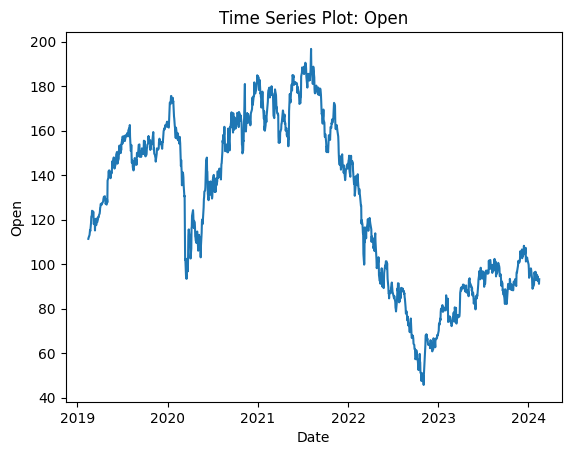

In [ ]:
# Call the function with your DataFrame
time_series_plot(data)

Enter the column name to plot the line graph:Close


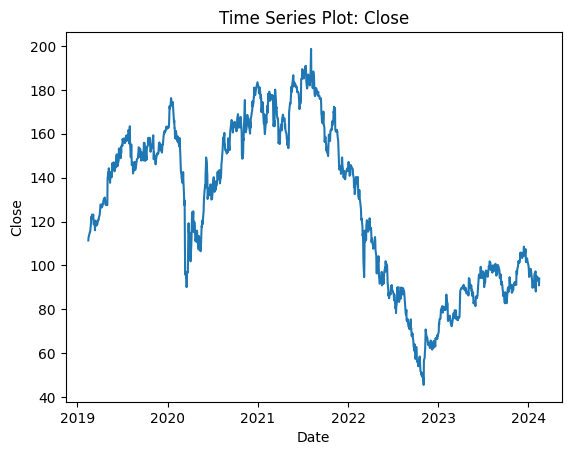

In [ ]:
time_series_plot(data)

Enter the column name to plot the line graph:Volume


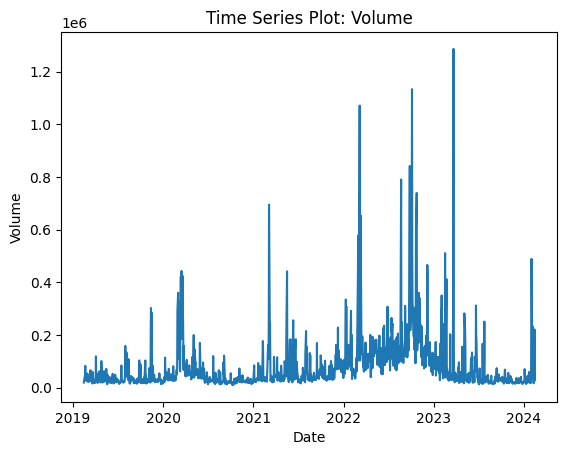

In [ ]:
time_series_plot(data)

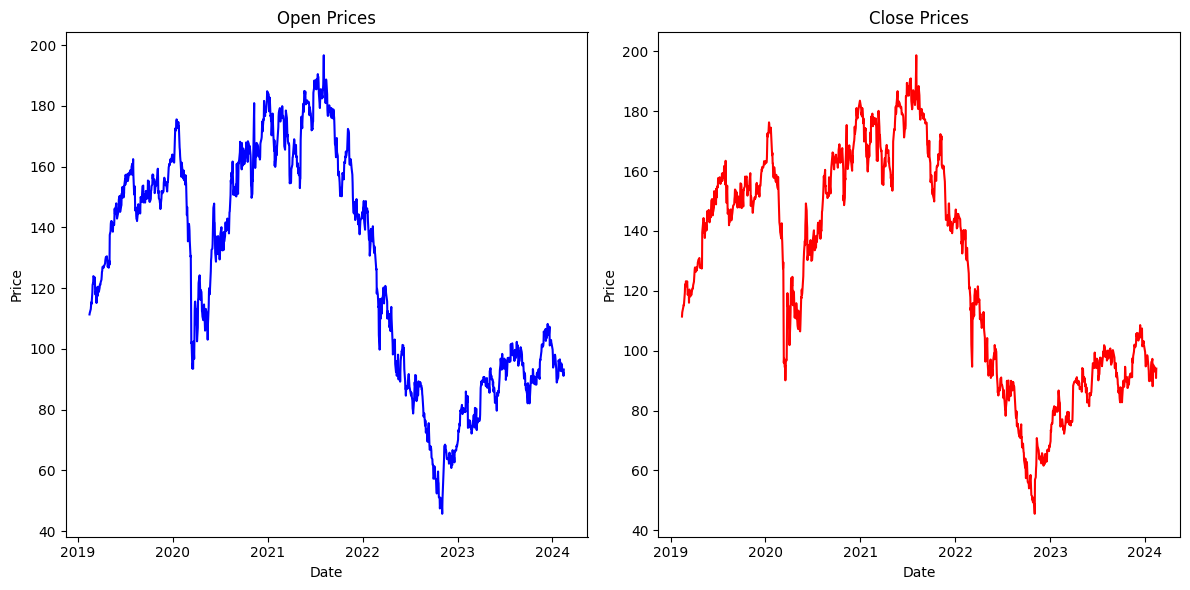

In [ ]:
def time_series_plot(dataframe):
  # Get the data column from the DataFrame
  x = dataframe['Date']

    # Get the values for the 'Open' and 'Close' columns
  open_prices = dataframe['Open']
  close_prices = dataframe['Close']  # Ensure variable name consistency

    # Create a figure and two subplots side by side
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the time series for the 'Open' column
  axs[0].plot(x, open_prices, color='blue')
  axs[0].set_title('Open Prices')
  axs[0].set_xlabel('Date')
  axs[0].set_ylabel('Price')

    # Plot the time series for the 'Close' column
  axs[1].plot(x, close_prices, color='red')
  axs[1].set_title('Close Prices')
  axs[1].set_xlabel('Date')
  axs[1].set_ylabel('Price')

    # Adjusting layout to prevent overlap of labels
  plt.tight_layout()

    # Display the plot
  plt.show()

# Now, call the function with your DataFrame
time_series_plot(data)

In [ ]:
def descriptive_statistics(dataframe):

# Calculate descriptive statistics for the 'Open' column
  open_stats = dataframe['Open'].describe()

# Calculate descriptive statistics for the 'Close' column
  close_stats = dataframe['Close'].describe()

  return open_stats, close_stats

# Call the function with your DataFrame
open_stats, close_stats = descriptive_statistics(data)

# Print the descriptive statistics
print("Descriptive Statistices for the 'Open' column:")
print(open_stats)
print("\nDescriptive Statistics for teh 'Close' column:")
print(close_stats)

Descriptive Statistices for the 'Open' column:
count   1259.00
mean     127.06
std       36.98
min       45.74
25%       93.12
50%      134.53
75%      158.47
max      196.68
Name: Open, dtype: float64

Descriptive Statistics for teh 'Close' column:
count   1259.00
mean     127.08
std       36.97
min       45.50
25%       93.19
50%      134.47
75%      158.58
max      198.68
Name: Close, dtype: float64


In [ ]:
def correlation_analysis(dataframe):

  # Select the columns for correlation analysis
  columns_of_interest = ['Open', 'High', 'Low', 'Close']

  # Calculate the correlation matrix
  correlations = dataframe[columns_of_interest].corr()

  return correlations

  # Call the function with your DataFrame
  correlations = dataframe[columns_of_interest].corr()

  return correlations

  # Call the function with your DataFrame
  correlations = correlation_analysis(data)

  # Print the correlation matrix
  print("Correlation Matrix:")
  print(correlations)

In [ ]:
# Find the row with the highest closing price
max_close_row = data.loc[data['Close'].idxmax()]

# Find the row with the lowest closing price
min_close_row = data.loc[data['Close'].idxmin()]

# Find the row with the highest closing price
max_volume_row = data.loc[data['Volume'].idxmax()]

# Find the row with the lowest closing price
min_volume_row = data.loc[data['Volume'].idxmin()]

# Print the results
print("Date with the highest closing price:" , max_close_row['Date'], "| Price:", max_close_row['Close'])
print("Date with the lowest closing price:" , min_close_row['Date'], "| Price:", min_close_row['Close'])
print("Date with the highest volume price:" , max_volume_row['Date'], "| Price:", max_volume_row['Close'])
print("Date with the lowest volume price:" , min_volume_row['Date'], "| Price:", min_volume_row['Close'])


Date with the highest closing price: 2021-08-04 00:00:00 | Price: 198.679993
Date with the lowest closing price: 2022-11-03 00:00:00 | Price: 45.5
Date with the highest volume price: 2023-03-22 00:00:00 | Price: 75.010002
Date with the lowest volume price: 2020-10-07 00:00:00 | Price: 164.110001


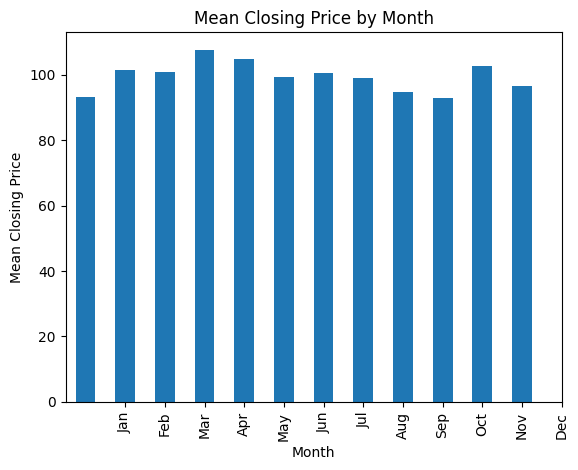

In [ ]:
# Group data by month and calculate mean closing price for each month
monthly_data = data.groupby(data['Date'].dt.month)['Close'].mean()

# Visualize the mean closing price for each month
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Mean Closing Price', title='Mean Closing Price by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
                          ])
plt.show()

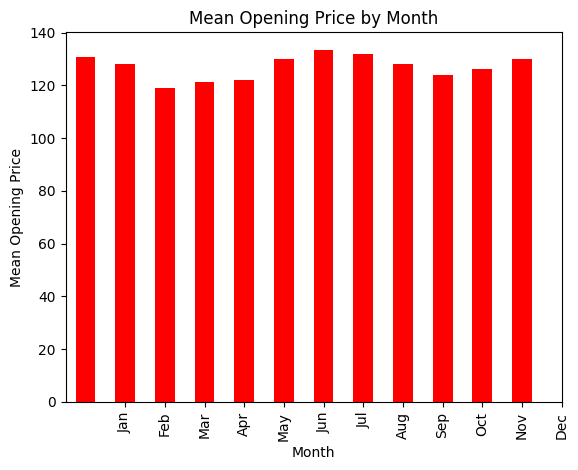

In [ ]:
# Group data by month and calculate mean closing price for each month
monthly_data = data.groupby(data['Date'].dt.month)['Open'].mean()

# Visualize the mean opening price for eaxh month
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Mean Opening Price', title='Mean Opening Price by Month', color='r')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ])
plt.show()

<ipython-input-55-ebf65c9c4a78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


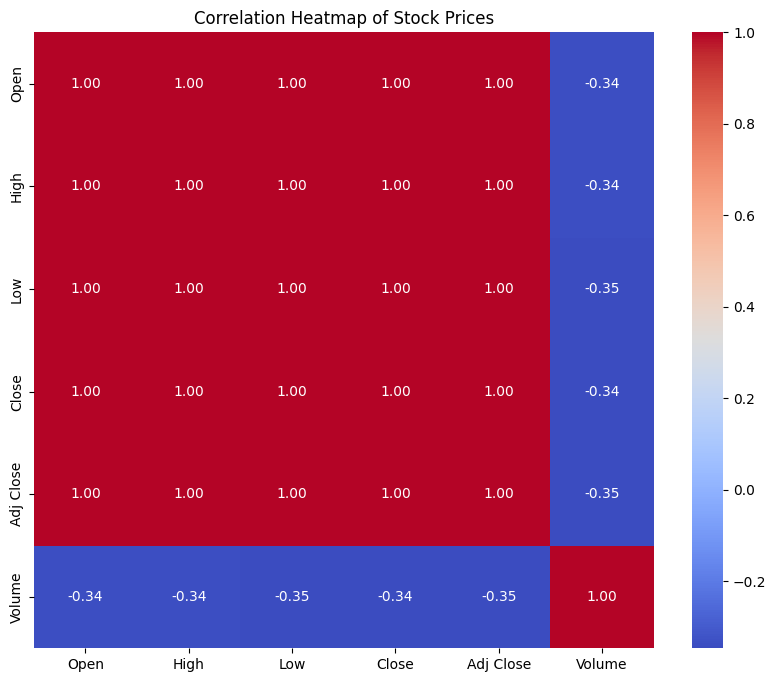

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

In [ ]:
# Create a pivot table
pivot_table = data.pivot_table(index='Date', values=['Open', 'High', 'Low', 'Close'], aggfunc='mean')

# Display the pivot table
print("Pivot Table:")
print(pivot_table)

Pivot Table:
            Close   High    Low   Open
Date                                  
2019-02-14 111.39 111.82 111.13 111.36
2019-02-15 112.80 113.02 111.55 111.83
2019-02-19 114.55 114.93 113.05 113.15
2019-02-20 115.22 115.34 114.15 114.15
2019-02-21 115.11 115.50 114.75 115.37
...           ...    ...    ...    ...
2024-02-08  93.71  93.83  92.06  92.60
2024-02-09  92.98  93.19  92.32  92.70
2024-02-12  93.54  94.00  92.13  92.24
2024-02-13  90.86  91.91  90.39  91.15
2024-02-14  94.00  94.12  92.78  93.22

[1259 rows x 4 columns]


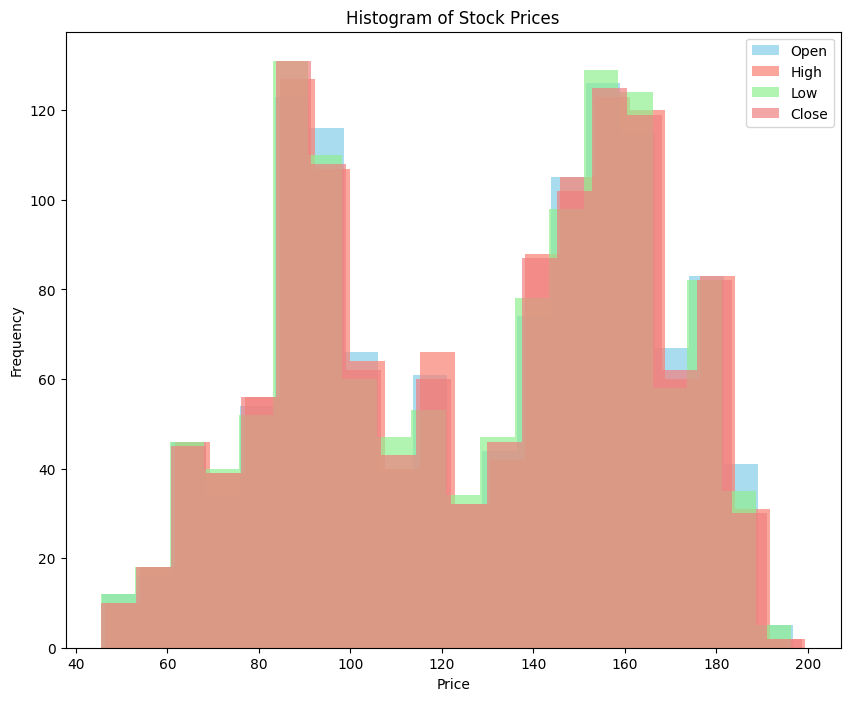

In [ ]:
# Histogram
plt.figure(figsize=(10, 8))
plt.hist(data['Open'], bins=20, color='skyblue', alpha=0.7, label='Open')
plt.hist(data['High'], bins=20, color='salmon', alpha=0.7, label='High')
plt.hist(data['Low'], bins=20, color='lightgreen', alpha=0.7, label='Low')
plt.hist(data['Close'], bins=20, color='lightcoral', alpha=0.7, label='Close')
plt.title('Histogram of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
# Extracting input features and target variable
from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 42)




In [6]:
# Initialize the Linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the coefficient and intercept
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [-5.98274798e-01  7.19952199e-01  8.74409207e-01 -9.43248657e-09]
Intercept: 0.597593745617857


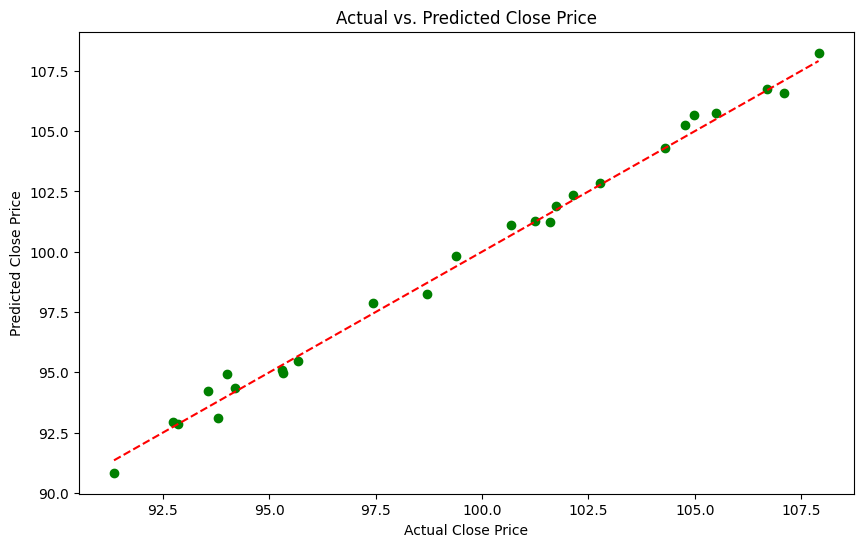

In [8]:
# Make prediction on the training data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()

In [10]:
def show_latest_stock_data(csv_file):


    # Assuming the data is sorted by Date in ascending order
    # Get the latest row
    latest_data = data.iloc[-1]

    print(f"Latest Open: {latest_data['Open']}")
    print(f"Latest High: {latest_data['High']}")
    print(f"Latest Low: {latest_data['Low']}")
    print(f"Latest Volume: {latest_data['Volume']}")

    return latest_data

# Example usage
latest_data = show_latest_stock_data(data)


Latest Open: 96.32
Latest High: 97.989998
Latest Low: 96.290001
Latest Volume: 9385200


In [26]:
np.array(latest_data[['Open', 'High', 'Low', 'Volume']],dtype=float)

array([9.6320000e+01, 9.7989998e+01, 9.6290001e+01, 9.3852000e+06])

In [28]:
# Define the coefficient and intercept for the Linear Regression Model
coefficients = model.coef_
intercept = model.intercept_

# scaler = StandardScaler().fit(X, y) # This line should fit the scaler to your training data
# input_features_scaled = scaler.transform(input_data) # Scale input features before prediction


# Define a function to make predictions
def predict_price(features):
    # If using scaled features, make sure 'features' is scaled appropriately
    predicted_price = np.dot(coefficients, features) + intercept
    return predicted_price

# # Assuming 'scaler' was fitted with DataFrame having columns ['Open', 'High', 'Low', 'Volume']
# input_data = pd.DataFrame([input_features], columns=['Open', 'High', 'Low', 'Volume'])
# input_features_scaled = scaler.transform(input_data)

# Example input data for prediction
input_features = np.array([latest_data['Open'], latest_data['High'],
                           92.779999, 29769])  # Adjust this with your actual input data [Open, High, Low, Volume]

# If you scaled your input data, make sure to use 'input_features_scaled' instead
# predicted_price = predict_price(input_features_scaled[0])
test = np.array(latest_data[['Open', 'High', 'Low', 'Volume']],dtype=float).reshape(1,-1)

predicted_price = model.predict(test)

print(f"Predicted Price is {predicted_price}")

Predicted Price is [97.62821741]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
